# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response= requests.get(url)
    if(str(response)=="<Response [200]>"):
        print(f"Processing City {city}")
    else:
        print("City not found skipping")

Beginning Data Retrieval
-----------------------------
Processing City victoria
Processing City mataura
Processing City esperance
Processing City castro
Processing City batagay-alyta
Processing City kommunar
Processing City yulara
Processing City carnarvon
Processing City mount isa
Processing City vaini
Processing City tura
Processing City bengkulu
Processing City aklavik
Processing City samarai
Processing City rikitea
Processing City torbay
Processing City richards bay
Processing City westport
Processing City kapaa
Processing City salalah
Processing City hermanus
Processing City new norfolk
Processing City xuddur
Processing City airai
City not found skipping
City not found skipping
Processing City san quintin
Processing City chuy
Processing City ushuaia
Processing City khatanga
City not found skipping
Processing City hurricane
Processing City hilo
Processing City bluff
Processing City klaksvik
Processing City ornes
City not found skipping
Processing City bambanglipuro
Processing City 

City not found skipping
Processing City oskemen
Processing City constitucion
Processing City zhigalovo
Processing City sri aman
Processing City catuday
Processing City alta floresta
Processing City evanston
Processing City pemangkat
Processing City takoradi
Processing City port hueneme
Processing City escanaba
City not found skipping
Processing City tocopilla
Processing City biak
Processing City veraval
Processing City prince rupert
Processing City san patricio
Processing City mersing
City not found skipping
Processing City saint-leu
Processing City nantucket
City not found skipping
Processing City yuzawa
Processing City challapata
Processing City lubao
Processing City taoudenni
Processing City la ronge
Processing City santa vitoria do palmar
Processing City tiksi
Processing City touros
Processing City arman
Processing City ocos
Processing City mehamn
Processing City nelson bay
Processing City asilah
Processing City manado
Processing City aripuana
Processing City gravelbourg
Processing

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
#Print one city information
url=f"http://api.openweathermap.org/data/2.5/weather?q=fortuna&appid={weather_api_key}"
response= requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.6,
        "lon": -124.16
    },
    "dt": 1592963730,
    "id": 5563839,
    "main": {
        "feels_like": 286.69,
        "humidity": 93,
        "pressure": 1014,
        "temp": 288.55,
        "temp_max": 290.37,
        "temp_min": 287.15
    },
    "name": "Fortuna",
    "sys": {
        "country": "US",
        "id": 4127,
        "sunrise": 1592916398,
        "sunset": 1592970675,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 8047,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 4.6
    }
}


In [46]:

query_url = url + "appid=" + weather_api_key + "&q=" + city
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json


{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [ ]:
#Cretate a dictionary of one city
weather_dict= {"City":"fortuna", "Lat":response["coord"]["lat"],"Lng":response["coord"]["lon"], 
               "Max Temp":response["main"]["temp_max"], "Humidity": response["main"]["humidity"],
               "Cloudiness":response["clouds"]["all"], "Wind Speed": response["wind"]["speed"],
               "Country":response["sys"]["country"], "Date":response["dt"]}
weather_dict

{'City': 'fortuna',
 'Cloudiness': 90,
 'Country': 'US',
 'Date': 1592963730,
 'Humidity': 93,
 'Lat': 40.6,
 'Lng': -124.16,
 'Max Temp': 290.37,
 'Wind Speed': 4.6}

In [6]:
#make empty list to contain the dictioaries of multiple cities
list_cityWeather= []
# Create a for loop to add each city information to the list 
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response= requests.get(url)
    if(str(response)=="<Response [200]>"):
        response=response.json()
        weather_dict= {"City":city, "Lat":response["coord"]["lat"],"Lng":response["coord"]["lon"], 
               "Max Temp":response["main"]["temp_max"], "Humidity": response["main"]["humidity"],
               "Cloudiness":response["clouds"]["all"], "Wind Speed": response["wind"]["speed"],
               "Country":response["sys"]["country"], "Date":response["dt"]}
        list_cityWeather.append(weather_dict)
list_cityWeather

[{'City': 'victoria',
  'Cloudiness': 99,
  'Country': 'HK',
  'Date': 1592963845,
  'Humidity': 74,
  'Lat': 22.29,
  'Lng': 114.16,
  'Max Temp': 303.71,
  'Wind Speed': 7.15},
 {'City': 'mataura',
  'Cloudiness': 87,
  'Country': 'NZ',
  'Date': 1592963974,
  'Humidity': 82,
  'Lat': -46.19,
  'Lng': 168.86,
  'Max Temp': 282.68,
  'Wind Speed': 0.75},
 {'City': 'esperance',
  'Cloudiness': 29,
  'Country': 'AU',
  'Date': 1592963932,
  'Humidity': 81,
  'Lat': -33.87,
  'Lng': 121.9,
  'Max Temp': 285.15,
  'Wind Speed': 8.2},
 {'City': 'castro',
  'Cloudiness': 0,
  'Country': 'BR',
  'Date': 1592963639,
  'Humidity': 94,
  'Lat': -24.79,
  'Lng': -50.01,
  'Max Temp': 285.54,
  'Wind Speed': 1.89},
 {'City': 'batagay-alyta',
  'Cloudiness': 71,
  'Country': 'RU',
  'Date': 1592963995,
  'Humidity': 27,
  'Lat': 67.8,
  'Lng': 130.41,
  'Max Temp': 301.04,
  'Wind Speed': 3.87},
 {'City': 'kommunar',
  'Cloudiness': 0,
  'Country': 'RU',
  'Date': 1592964064,
  'Humidity': 82,
  '

In [7]:
# Convert list of dictionaries to a dataframe
df_weather = pd.DataFrame(list_cityWeather)
df_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,victoria,22.29,114.16,303.71,74,99,7.15,HK,1592963845
1,mataura,-46.19,168.86,282.68,82,87,0.75,NZ,1592963974
2,esperance,-33.87,121.90,285.15,81,29,8.20,AU,1592963932
3,castro,-24.79,-50.01,285.54,94,0,1.89,BR,1592963639
4,batagay-alyta,67.80,130.41,301.04,27,71,3.87,RU,1592963995


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
df_weather.describe()
# We can see from max humidity in the describe below that max humidity = 100 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,21.213135,16.741550,293.292432,70.549550,47.407207,3.331604,1.592956e+09
std,33.052044,89.062557,7.930297,22.295415,37.383126,2.102219,5.918010e+01
min,-54.800000,-175.200000,273.440000,1.000000,0.000000,0.170000,1.592956e+09
25%,-6.220000,-58.185000,287.515000,60.500000,7.000000,1.760000,1.592956e+09
50%,24.800000,21.290000,294.570000,77.000000,41.000000,2.970000,1.592956e+09
75%,49.245000,93.025000,299.150000,87.000000,85.000000,4.520000,1.592956e+09
max,78.220000,179.320000,315.370000,100.000000,100.000000,11.300000,1.592956e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df_weather.to_csv(output_data_file, index=False,)  

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

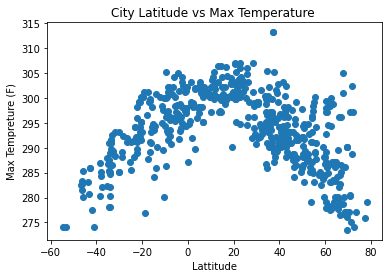

In [27]:
df_lat_Maxtemp= df_weather[["Lat", "Max Temp"]]
plt.scatter(df_lat_Maxtemp["Lat"], df_lat_Maxtemp["Max Temp"])
plt.xlabel("Lattitude")
plt.ylabel("Max Tempreture (F)")
plt.title("City Latitude vs Max Temperature ")
plt.savefig("../output_data/lat_MaxTemp_Global")
plt.show()

## Latitude vs. Humidity Plot

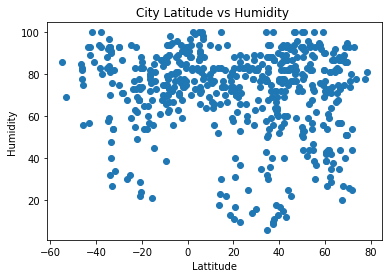

In [28]:
df_lat_humidity= df_weather[["Lat", "Humidity"]]
plt.scatter(df_lat_humidity["Lat"], df_lat_humidity["Humidity"])
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity ")
plt.savefig("../output_data/lat_Humidity_Global")
plt.show()

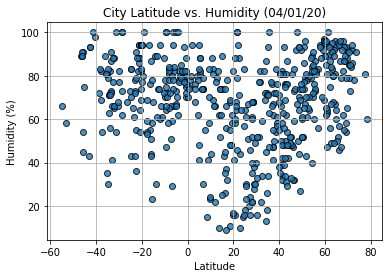

## Latitude vs. Cloudiness Plot

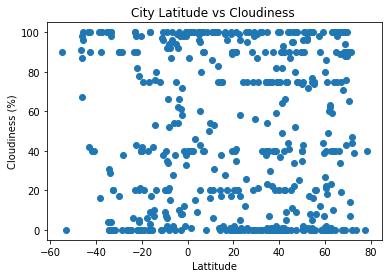

In [29]:
df_lat_Cloudiness= df_weather[["Lat", "Cloudiness"]]
plt.scatter(df_lat_Cloudiness["Lat"], df_lat_Cloudiness["Cloudiness"])
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness ")
plt.savefig("../output_data/lat_Cloudiness_Global")
plt.show()

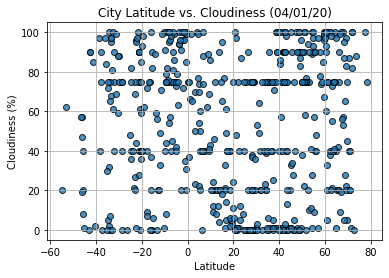

## Latitude vs. Wind Speed Plot

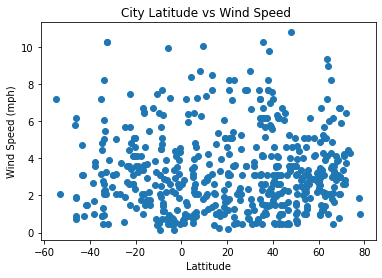

In [30]:
df_lat_WindSpeed= df_weather[["Lat", "Wind Speed"]]
plt.scatter(df_lat_WindSpeed["Lat"], df_lat_WindSpeed["Wind Speed"])
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed ")
plt.savefig("../output_data/lat_WindSpeed_Global")
plt.show()

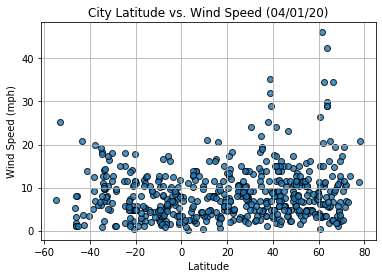

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
def pltLR(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [32]:
# Create Northern and Southern Hemisphere DataFrames
df_Northern = df_weather[df_weather["Lat"]>0]
df_Southern = df_weather[df_weather["Lat"]<0]
df_Northern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,victoria,22.29,114.16,303.71,74,99,7.15,HK,1592963845
4,batagay-alyta,67.80,130.41,301.04,27,71,3.87,RU,1592963995
5,kommunar,59.62,30.39,288.15,82,0,3.00,RU,1592964064
10,tura,25.52,90.22,299.91,88,26,2.40,IN,1592963972
12,aklavik,68.22,-135.01,280.15,75,90,3.10,CA,1592963763


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4754155410875317


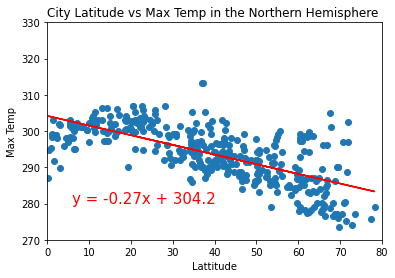

In [33]:
df_lat_MaxTemp= df_Northern[["Lat", "Max Temp"]]
x_values= df_lat_MaxTemp["Lat"]
y_values= df_lat_MaxTemp["Max Temp"]
#plt.scatter(df_lat_MaxTemp["Max Temp"], df_lat_MaxTemp["Lat"])
#pltLR(df_lat_MaxTemp["Max Temp"], df_lat_MaxTemp["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(0,80)
plt.ylim(270,330)
plt.annotate(line_eq,(6,280),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_MaxTemp_Northern")
plt.show()

The r-squared is: 0.8271188905041935


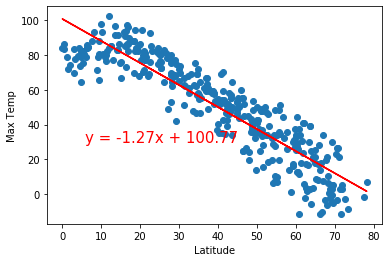

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5946420420983616


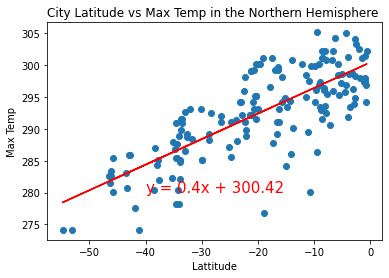

In [34]:
df_lat_MaxTemp= df_Southern[["Lat", "Max Temp"]]
x_values= df_lat_MaxTemp["Lat"]
y_values= df_lat_MaxTemp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,280),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_MaxTemp_Southern")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.01092745375895676


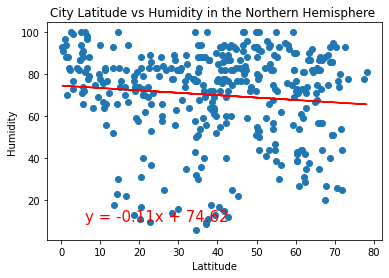

In [35]:
df_lat_Humidity= df_Northern[["Lat", "Humidity"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_Humidity_Northern")
plt.show()


The r-squared is: 0.10829462153873139


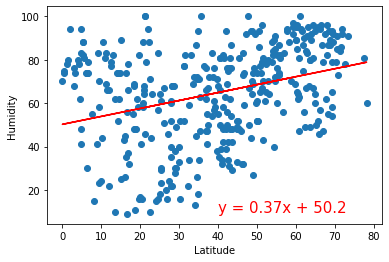

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0009242683415946976


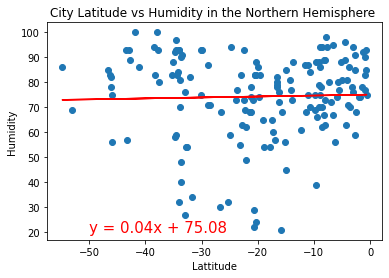

In [36]:
df_lat_Humidity= df_Southern[["Lat", "Humidity"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_Humidity_Southern")
plt.show()

The r-squared is: 0.0008996079328825663


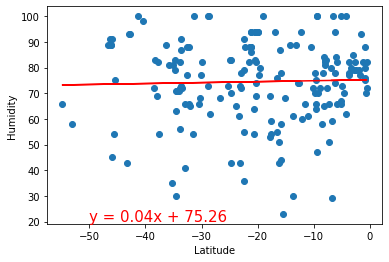

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.002982345403342437


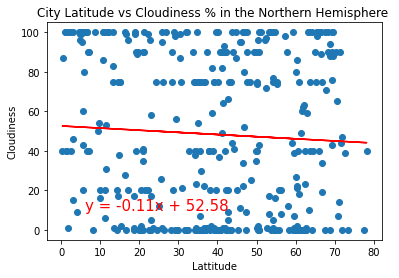

In [38]:
df_lat_Humidity= df_Northern[["Lat", "Cloudiness"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness % in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_Cloudiness_Northern")
plt.show()

The r-squared is: 0.05768812657005063


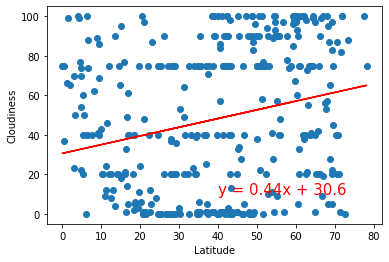

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.005376665991288115


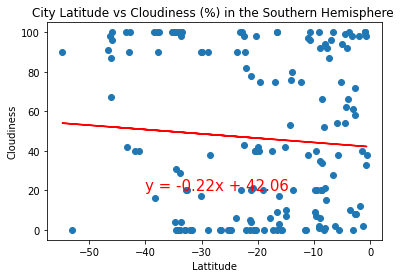

In [37]:
df_lat_Humidity= df_Southern[["Lat", "Cloudiness"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (%) in the Southern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_Cloudiness_Southern")
plt.show()

The r-squared is: 0.0684912094859049


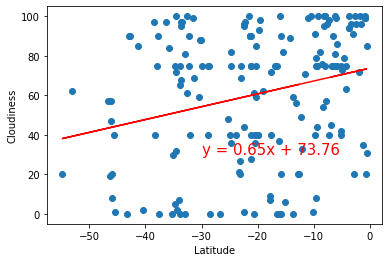

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.00021487796345198462


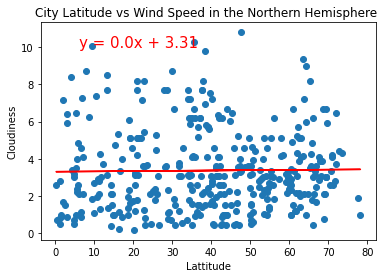

In [40]:
df_lat_WindSpeed= df_Northern[["Lat", "Wind Speed"]]
x_values= df_lat_WindSpeed["Lat"]
y_values= df_lat_WindSpeed["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Wind Speed in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_WindSpeed_Northern")
plt.show()

The r-squared is: 0.023371104533850804


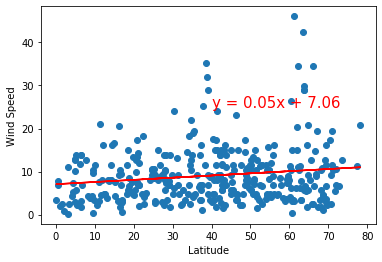

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.01210324738902343


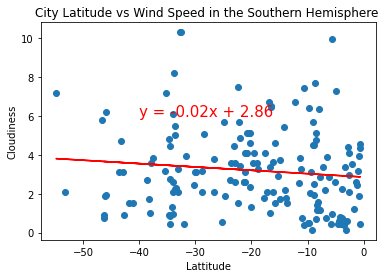

In [39]:
df_lat_WindSpeed= df_Southern[["Lat", "Wind Speed"]]
x_values= df_lat_WindSpeed["Lat"]
y_values= df_lat_WindSpeed["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,6),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Wind Speed in the Southern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_WindSpeed_Southern")
plt.show()

The r-squared is: 0.03381889207758188


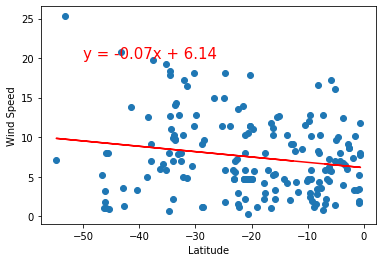